<a href="https://colab.research.google.com/github/Zahra-Aliyeva/Data-analysis/blob/main/player_role_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd

In [22]:
df=pd.read_csv('/content/player_role_clusters (1).csv')
df

,record_id,season_end_year,player,squad,comp,primary_position,age,min_playing,position_group,kmeans_cluster,gmm_cluster,hdbscan_cluster,hierarchical_cluster,dbscan_cluster,ensemble_cluster,kmeans_role,gmm_role,hdbscan_role
0,0,2018,Martin Agirregabiria,Alavés,La Liga,DF,21.0,1828.0,DEF,1,1,7,0,-1,1,Balanced Defender,Balanced Defender,Crossing Fullback/Progressive Fullback
1,1,2018,Alexis,Alavés,La Liga,DF,31.0,2184.0,DEF,2,0,0,2,-1,2,Defensive Defender/Pressing,Defensive Defender/Pressing,Defensive Defender
2,2,2018,Burgui,Alavés,La Liga,MF,23.0,1034.0,MID,0,1,1,2,-1,0,Balanced Midfielder,Balanced Midfielder,Balanced Midfielder
3,3,2018,Rubén Duarte,Alavés,La Liga,DF,21.0,2138.0,DEF,0,1,6,1,-1,1,Crossing Fullback,Balanced Defender,Crossing Fullback/Pressing
4,4,2018,Rodrigo Ely,Alavés,La Liga,DF,23.0,2691.0,DEF,2,0,0,2,-1,2,Defensive Defender/Pressing,Defensive Defender/Pressing,Defensive Defender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11268,11268,2024,Mario Lemina,Wolves,Premier League,MF,29.0,2968.0,MID,1,1,1,0,-1,1,Defensive/Pressing Midfielder,Balanced Midfielder,Balanced Midfielder
11269,11269,2024,Pedro Neto,Wolves,Premier League,FW,23.0,1516.0,FWD,0,1,3,0,-1,0,Crossing Winger,Balanced Forward,Crossing Winger
11270,11270,2024,José Sá,Wolves,Premier League,GK,30.0,3037.0,GK,2,1,1,2,-1,2,Balanced Goalkeeper,Sweeper Keeper/Clinical,Balanced Goalkeeper
11271,11271,2024,Pablo Sarabia,Wolves,Premier League,MF,31.0,1745.0,MID,2,1,0,1,-1,1,Crossing/Playmaker,Balanced Midfielder,Crossing


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11273 entries, 0 to 11272
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             11273 non-null  int64  
 1   season_end_year       11273 non-null  int64  
 2   player                11273 non-null  object 
 3   squad                 11273 non-null  object 
 4   comp                  11273 non-null  object 
 5   primary_position      11273 non-null  object 
 6   age                   11273 non-null  float64
 7   min_playing           11273 non-null  float64
 8   position_group        11273 non-null  object 
 9   kmeans_cluster        11273 non-null  int64  
 10  gmm_cluster           11273 non-null  int64  
 11  hdbscan_cluster       11273 non-null  int64  
 12  hierarchical_cluster  11273 non-null  int64  
 13  dbscan_cluster        11273 non-null  int64  
 14  ensemble_cluster      11273 non-null  int64  
 15  kmeans_role        

In [24]:
df["season_end_year"] = df["season_end_year"].astype(int)
df["age"] = df["age"].astype(int)
df["min_playing"] = df["min_playing"].astype(int)

In [25]:
df.dtypes

,0
record_id,int64
season_end_year,int64
player,object
squad,object
comp,object
primary_position,object
age,int64
min_playing,int64
position_group,object
kmeans_cluster,int64


In [26]:
df.isnull().sum()

,0
record_id,0
season_end_year,0
player,0
squad,0
comp,0
primary_position,0
age,0
min_playing,0
position_group,0
kmeans_cluster,0


In [27]:
df.primary_position.value_counts()

,count
primary_position,
DF,4439
MF,3582
FW,2413
GK,839


<Axes: xlabel='primary_position'>

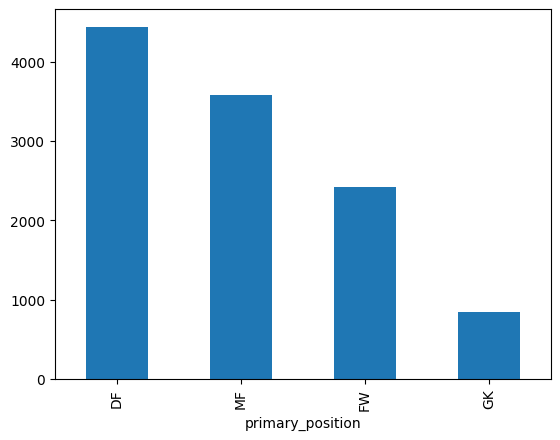

In [28]:
df['primary_position'].value_counts().plot(kind='bar')

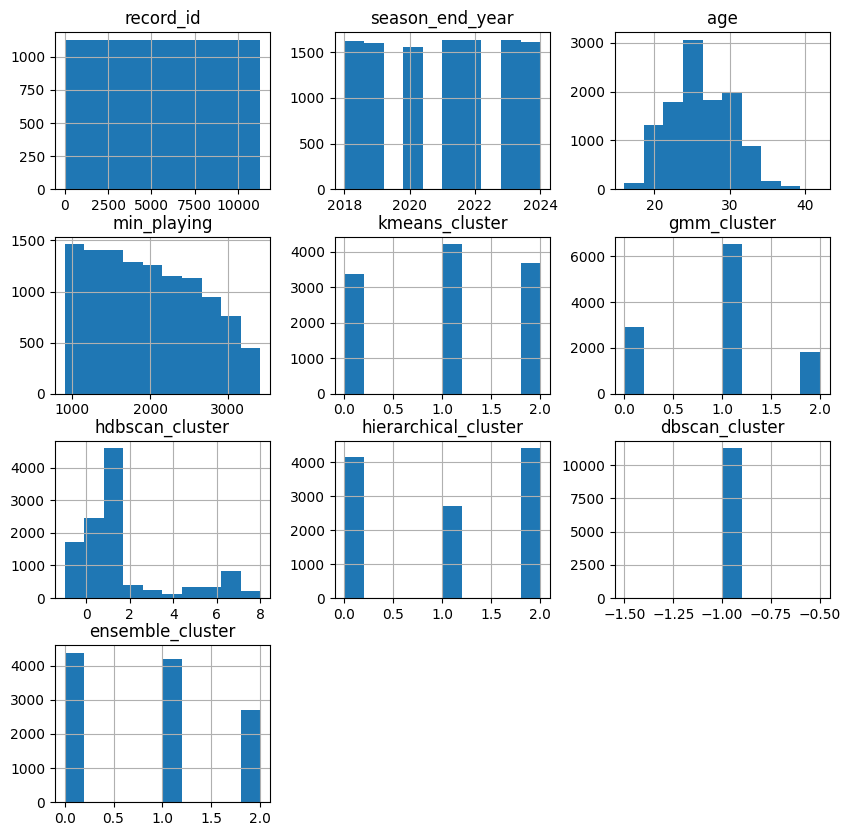

In [29]:
df.hist(figsize=(10,10));

Categorize players into Low, Medium, and High activity levels based on their total playing time.



In [30]:
import numpy as np
df["playing_time_level"] = np.where(
    df["min_playing"] < 900, "Low",
    np.where(df["min_playing"] < 2000, "Medium", "High")
)
df


,record_id,season_end_year,player,squad,comp,primary_position,age,min_playing,position_group,kmeans_cluster,gmm_cluster,hdbscan_cluster,hierarchical_cluster,dbscan_cluster,ensemble_cluster,kmeans_role,gmm_role,hdbscan_role,playing_time_level
0,0,2018,Martin Agirregabiria,Alavés,La Liga,DF,21,1828,DEF,1,1,7,0,-1,1,Balanced Defender,Balanced Defender,Crossing Fullback/Progressive Fullback,Medium
1,1,2018,Alexis,Alavés,La Liga,DF,31,2184,DEF,2,0,0,2,-1,2,Defensive Defender/Pressing,Defensive Defender/Pressing,Defensive Defender,High
2,2,2018,Burgui,Alavés,La Liga,MF,23,1034,MID,0,1,1,2,-1,0,Balanced Midfielder,Balanced Midfielder,Balanced Midfielder,Medium
3,3,2018,Rubén Duarte,Alavés,La Liga,DF,21,2138,DEF,0,1,6,1,-1,1,Crossing Fullback,Balanced Defender,Crossing Fullback/Pressing,High
4,4,2018,Rodrigo Ely,Alavés,La Liga,DF,23,2691,DEF,2,0,0,2,-1,2,Defensive Defender/Pressing,Defensive Defender/Pressing,Defensive Defender,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11268,11268,2024,Mario Lemina,Wolves,Premier League,MF,29,2968,MID,1,1,1,0,-1,1,Defensive/Pressing Midfielder,Balanced Midfielder,Balanced Midfielder,High
11269,11269,2024,Pedro Neto,Wolves,Premier League,FW,23,1516,FWD,0,1,3,0,-1,0,Crossing Winger,Balanced Forward,Crossing Winger,Medium
11270,11270,2024,José Sá,Wolves,Premier League,GK,30,3037,GK,2,1,1,2,-1,2,Balanced Goalkeeper,Sweeper Keeper/Clinical,Balanced Goalkeeper,High
11271,11271,2024,Pablo Sarabia,Wolves,Premier League,MF,31,1745,MID,2,1,0,1,-1,1,Crossing/Playmaker,Balanced Midfielder,Crossing,Medium


Age-based player classification into Young / Prime / Experienced categories.


In [31]:
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 23, 29, 40],
    labels=["Young", "Prime", "Experienced"]
)
df


,record_id,season_end_year,player,squad,comp,primary_position,age,min_playing,position_group,kmeans_cluster,gmm_cluster,hdbscan_cluster,hierarchical_cluster,dbscan_cluster,ensemble_cluster,kmeans_role,gmm_role,hdbscan_role,playing_time_level,age_group
0,0,2018,Martin Agirregabiria,Alavés,La Liga,DF,21,1828,DEF,1,1,7,0,-1,1,Balanced Defender,Balanced Defender,Crossing Fullback/Progressive Fullback,Medium,Young
1,1,2018,Alexis,Alavés,La Liga,DF,31,2184,DEF,2,0,0,2,-1,2,Defensive Defender/Pressing,Defensive Defender/Pressing,Defensive Defender,High,Experienced
2,2,2018,Burgui,Alavés,La Liga,MF,23,1034,MID,0,1,1,2,-1,0,Balanced Midfielder,Balanced Midfielder,Balanced Midfielder,Medium,Young
3,3,2018,Rubén Duarte,Alavés,La Liga,DF,21,2138,DEF,0,1,6,1,-1,1,Crossing Fullback,Balanced Defender,Crossing Fullback/Pressing,High,Young
4,4,2018,Rodrigo Ely,Alavés,La Liga,DF,23,2691,DEF,2,0,0,2,-1,2,Defensive Defender/Pressing,Defensive Defender/Pressing,Defensive Defender,High,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11268,11268,2024,Mario Lemina,Wolves,Premier League,MF,29,2968,MID,1,1,1,0,-1,1,Defensive/Pressing Midfielder,Balanced Midfielder,Balanced Midfielder,High,Prime
11269,11269,2024,Pedro Neto,Wolves,Premier League,FW,23,1516,FWD,0,1,3,0,-1,0,Crossing Winger,Balanced Forward,Crossing Winger,Medium,Young
11270,11270,2024,José Sá,Wolves,Premier League,GK,30,3037,GK,2,1,1,2,-1,2,Balanced Goalkeeper,Sweeper Keeper/Clinical,Balanced Goalkeeper,High,Experienced
11271,11271,2024,Pablo Sarabia,Wolves,Premier League,MF,31,1745,MID,2,1,0,1,-1,1,Crossing/Playmaker,Balanced Midfielder,Crossing,Medium,Experienced


Which position group has the highest number of players?

In [32]:
df["position_group"].value_counts()


,count
position_group,
DEF,4439
MID,3582
FWD,2413
GK,839


Analyze whether KMeans clusters differ by playing time by comparing the average minutes played per cluster.

In [33]:
df.groupby("kmeans_cluster")["min_playing"].mean()


,min_playing
kmeans_cluster,
0,1889.239143
1,1671.605076
2,2395.899323


Investigate whether a player is assigned different roles across various models.

In [34]:
df["role_mismatch"] = (
    (df["kmeans_role"] != df["gmm_role"]) |
    (df["kmeans_role"] != df["hdbscan_role"])
)
df["role_mismatch"].value_counts()


,count
role_mismatch,
True,7952
False,3321


Identify the cluster with the highest average age.

In [35]:
df.groupby("ensemble_cluster")["age"].mean().sort_values(ascending=False)


,age
ensemble_cluster,
2,26.823486
0,26.149315
1,25.569176


Distribution of playing time across position groups (Boxplot)

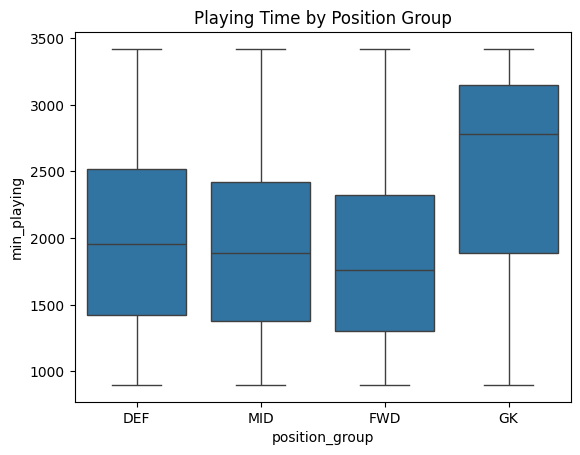

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x="position_group", y="min_playing")
plt.title("Playing Time by Position Group")
plt.show()


Distribution of player ages across clusters

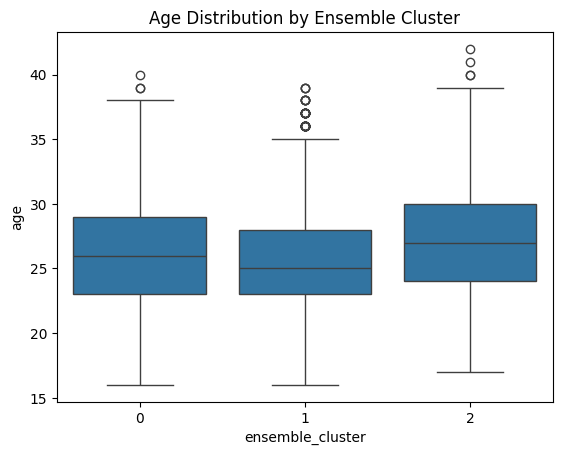

In [37]:
sns.boxplot(data=df, x="ensemble_cluster", y="age")
plt.title("Age Distribution by Ensemble Cluster")
plt.show()


Visualization of role inconsistencies

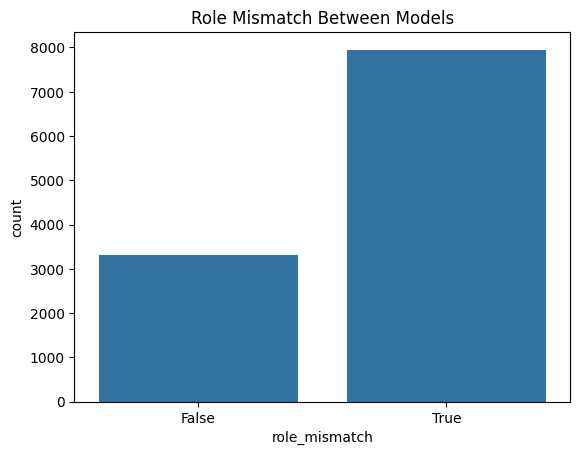

In [38]:
sns.countplot(data=df, x="role_mismatch")
plt.title("Role Mismatch Between Models")
plt.show()
